# Week2 (Wuwei Zhang)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

def load_dataset():
    mndata = MNIST('C:/Users/Zhang/python-mnist/data')
    A_train, labels_train = map(np.array, mndata.load_training()) 
    A_test, labels_test = map(np.array, mndata.load_testing()) 
    A_train = A_train/255.0
    A_test = A_test/255.0
    
    return A_train, A_test, labels_train, labels_test

A_train, A_test, labels_train, labels_test = load_dataset()


B_labels_train = np.zeros((60000, 10))
for i in range(len(labels_train)):
    B_labels_train[i, labels_train[i]] = 1
B_labels_test = np.zeros((10000, 10))
for j in range(len(labels_test)):
    B_labels_test[j, labels_test[j]] = 1

## What are the most important pixels for each digit? 

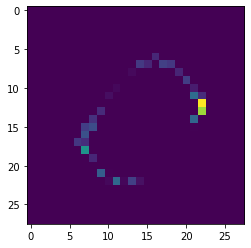

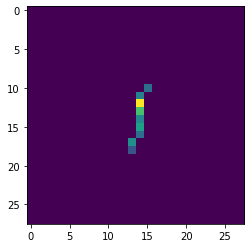

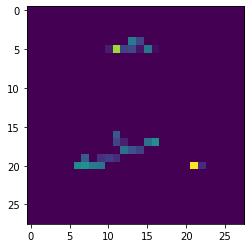

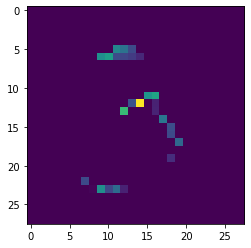

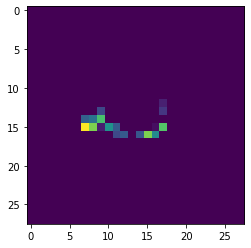

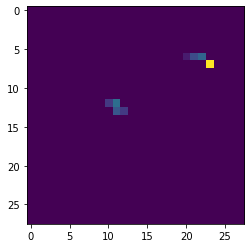

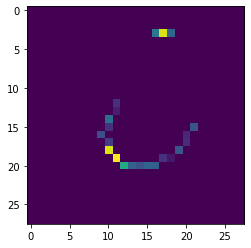

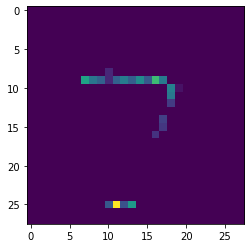

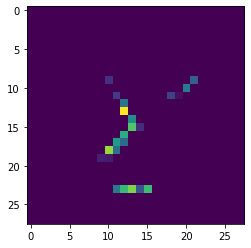

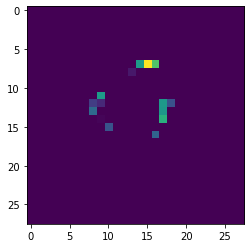

In [3]:
# Use Lasso
from sklearn import linear_model
lam = 0.01

clf = linear_model.Lasso(alpha=lam)
clf.fit(A_train, B_labels_train)
X = clf.coef_.T
B_test_predicted = np.matmul(A_test, clf.coef_.T)
labels_test_predicted = np.argmax(B_test_predicted, axis = 1)
accuracy = 1-np.count_nonzero(labels_test - labels_test_predicted)/10000


# Use the big X solution. Pick out the top 40 pixels for each column 
# and visualize them.
for i in range(0,10):
    pixel_info = np.zeros(784)
    largest_values_indices = (np.argsort(X[:,i]))[744:784]
    values = X[largest_values_indices, i]
    pixel_info[largest_values_indices] = values
    plt.figure()
    # reshape the flatten 784 pixels into the 28x28 picture.
    plt.imshow(pixel_info.reshape(28,28))

We only want to use $\textbf{Lasso}$ with lambda = 0.01 lambda = 0.02 (both works).  
The reason is that lasso wants to force as many of the entries of our 
solution X to be zero as possible.  
That means that any entries that are non-zero must be the most important 
in the map. This kind of analysis of the 40 most important pixels will work 
best for lasso.
But if our penality lambda is too large, most entries in our solution X 
is forced to be 0, so many of the 40 most important pixels we get would be 0
and cannot show much information when we visualize them.

## Cross validation for Lasso to choose lambda1

$\textbf{Define error}$ as percentage of number of wrong predictions (i.e. 1-accuracy): 
np.count_nonzero(labels_test - labels_test_predicted)/10000

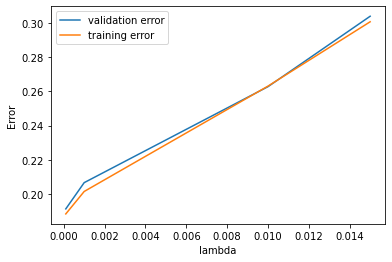

In [4]:
from sklearn.model_selection import train_test_split

# Define error as number of wrong predictions (i.e. 1-accuracy)
# np.count_nonzero(labels_test - labels_test_predicted)/10000

lam = [ 0.0001, 0.001, 0.01, 0.015]
mean_training_error = np.zeros(4)
mean_validation_error = np.zeros(4)

for i in range(4):
    training_error = np.zeros(3)
    validation_error = np.zeros(3)
    for j in range(3):
        x_train, x_vali, y_train, y_vali = train_test_split(A_train, B_labels_train)
        # Store the labels of training and validation sets, respectively.
        labels_training = np.argmax(y_train, axis = 1)
        labels_validation = np.argmax(y_vali, axis = 1)

        # Fit the Lasso model using training set
        clf = linear_model.Lasso(alpha=lam[i])
        clf.fit(x_train, y_train)
        solution = clf.coef_.T
        # Compute training error and validation error
        y_train_predicted = np.matmul(x_train, clf.coef_.T)
        y_vali_predicted = np.matmul(x_vali, clf.coef_.T)
        labels_train_predicted = np.argmax(y_train_predicted, axis = 1)
        labels_vali_predicted = np.argmax(y_vali_predicted, axis = 1)
        training_error[j] = np.count_nonzero(labels_training - 
                                         labels_train_predicted)/45000
        validation_error[j] = np.count_nonzero(labels_validation - 
                                           labels_vali_predicted)/15000 
    mean_training_error[i] = np.mean(training_error)
    mean_validation_error[i] = np.mean(validation_error)
 

plt.plot(lam, mean_validation_error, label="validation error")
plt.plot(lam, mean_training_error, label = "training error")
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend()
plt.show()

* By tring different lambda values, we all get similar values of training error and validation error. 
* Q: Is my process correct? For each lambda, I split training set and validation set 3 times (could be n), and then compute training errors and validation errors and take average.
* Q: I cannot find the points where the model is too specialized to train set and makes validation error increase......
* Q: What if we want to find the best lambda1 and lambda2 for elasticNet regression at the same time, can we still use cross-validation?